# **Loading the Data⬇️**

In [1]:
import pandas as pd

train_df = pd.read_csv('traindata.csv')
test_df = pd.read_csv('testdata.csv')

print("Training Data Overview:")
print(train_df.head())

print("\nTraining Data Info:")
print(train_df.info())

print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())


Training Data Overview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# **Data Cleaning and Preprocessing🚀**

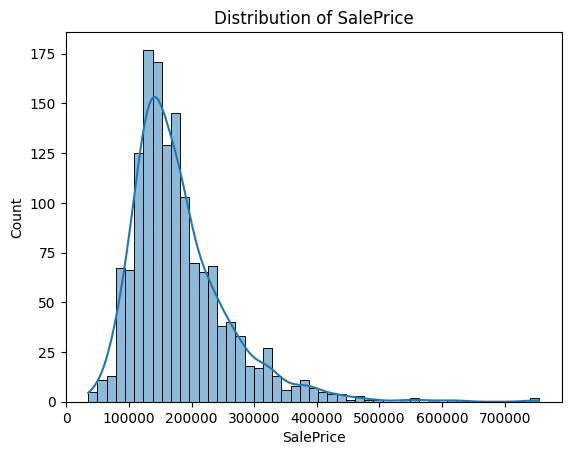

In [10]:

sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

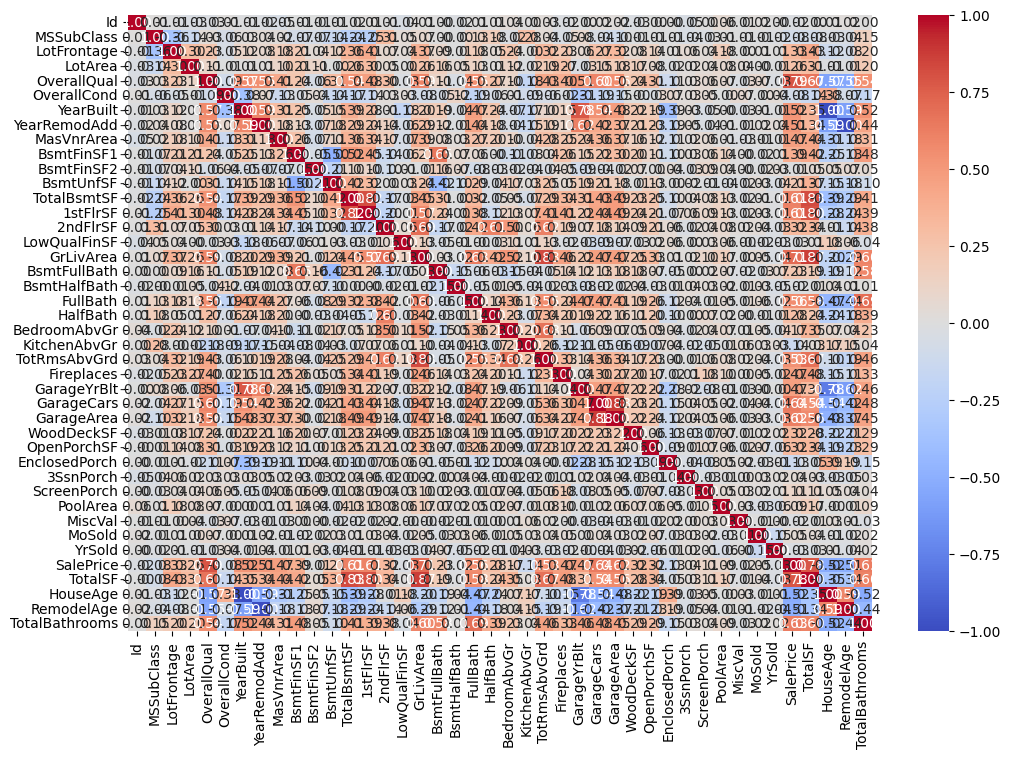

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = train_df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [2]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)

train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0], inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
train_df['GarageType'].fillna(train_df['GarageType'].mode()[0], inplace=True)
train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0], inplace=True)
train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0], inplace=True)
train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0], inplace=True)
train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0], inplace=True)
train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0], inplace=True)
train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0], inplace=True)
train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0], inplace=True)
train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0], inplace=True)

train_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

print("Remaining Missing Values (Should be 0):")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


Remaining Missing Values (Should be 0):
FireplaceQu    690
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_31700\2233208209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_31700\2233208209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [3]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna("No Fireplace")

print("Remaining Missing Values (Should be 0):")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


Remaining Missing Values (Should be 0):
Series([], dtype: int64)


C:\Users\dell\AppData\Local\Temp\ipykernel_31700\1648456672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna("No Fireplace", inplace=True)


# **Feature Engineering👨‍🔧**

In [4]:
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['TotalBsmtSF']

train_df['HouseAge'] = 2024 - train_df['YearBuilt']

train_df['RemodelAge'] = 2024 - train_df['YearRemodAdd']

train_df['TotalBathrooms'] = train_df['FullBath'] + (0.5 * train_df['HalfBath']) + train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath'])

print(train_df[['TotalSF', 'HouseAge', 'RemodelAge', 'TotalBathrooms']].head())


   TotalSF  HouseAge  RemodelAge  TotalBathrooms
0     2566        21          21             3.5
1     2524        48          48             2.5
2     2706        23          22             3.5
3     2473       109          54             2.0
4     3343        24          24             3.5


In [5]:
train_df_encoded = pd.get_dummies(train_df)

print(train_df_encoded.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

# **Splitting the Data⚙️**

In [6]:
X = train_df_encoded.drop(['SalePrice', 'Id'], axis=1)
y = train_df_encoded['SalePrice']

print(X.shape)
print(y.shape)


(1460, 279)
(1460,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(1168, 279)
(292, 279)
(1168,)
(292,)


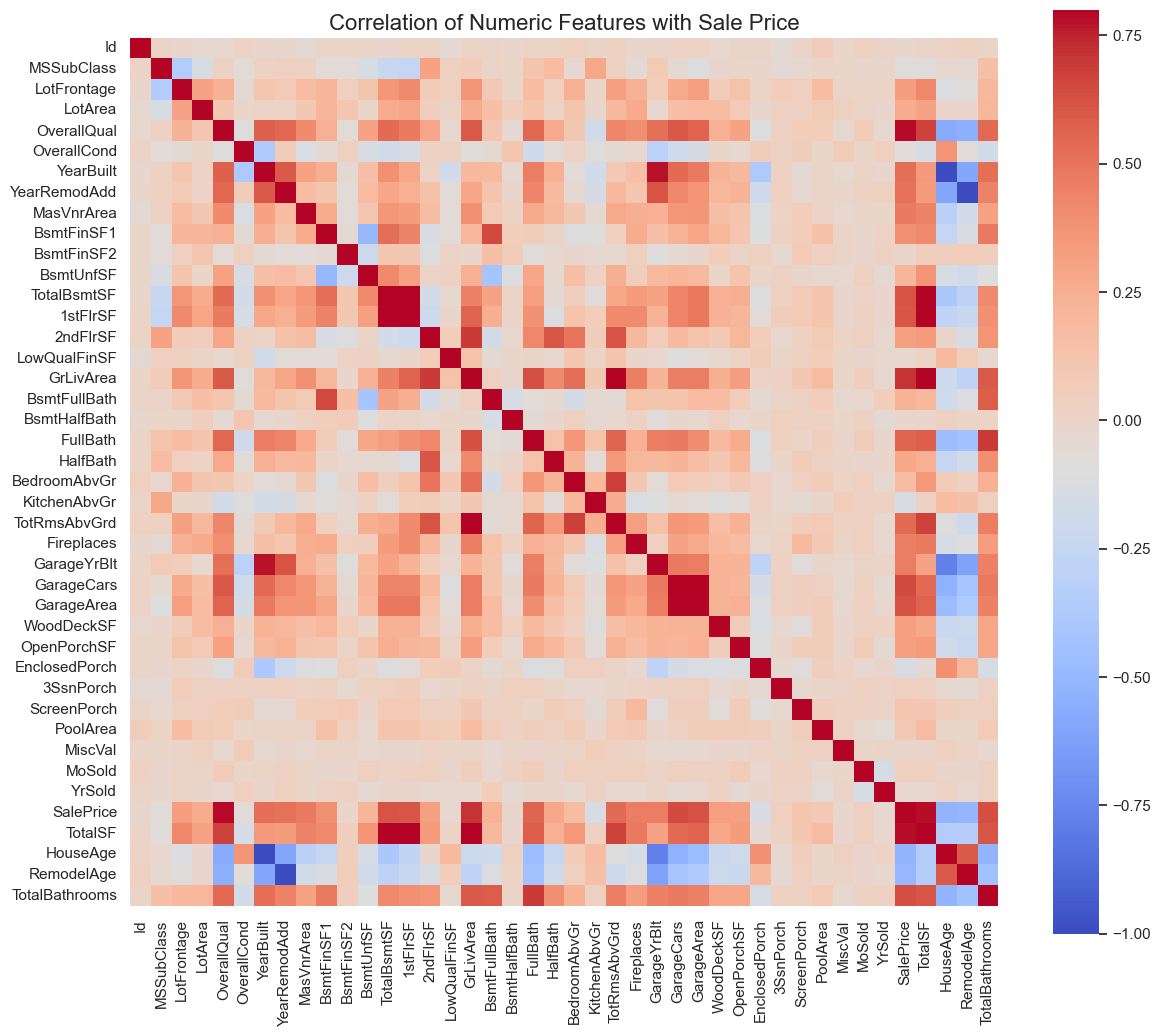

In [64]:
numeric_df = train_df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, vmax=0.8)

plt.title('Correlation of Numeric Features with Sale Price', fontsize=16)

plt.show()


# **Training the Model**

## Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin_reg = lin_reg.predict(X_test)

lin_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
print(f"Linear Regression RMSE: {lin_reg_rmse}")


Linear Regression RMSE: 29657.85607870745


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf_reg = rf_reg.predict(X_test)

rf_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))
print(f"Random Forest RMSE: {rf_reg_rmse}")


Random Forest RMSE: 29552.898346900583


### XGBoost

In [18]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_reg))
print(f"XGBoost RMSE: {xgb_reg_rmse}")


XGBoost RMSE: 27283.385014427786


### HyperTuning the XGBoost model

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}


In [20]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='neg_mean_squared_error',
    cv=5,  
    verbose=1,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [21]:
print("Best parameters found: ", random_search.best_params_)

best_xgb = random_search.best_estimator_

y_pred_best_xgb = best_xgb.predict(X_val)

best_xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred_best_xgb))
print(f"Best XGBoost RMSE after tuning: {best_xgb_rmse}")

Best parameters found:  {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best XGBoost RMSE after tuning: 25553.10220227063


### Stacking Ensemble 

In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

best_params = {
    'subsample': 1.0,
    'reg_lambda': 1,
    'reg_alpha': 0.1,
    'n_estimators': 500,
    'min_child_weight': 5,
    'max_depth': 5,
    'learning_rate': 0.1,
    'gamma': 0.3,
    'colsample_bytree': 0.6
}

estimators = [
    ('lin_reg', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(**best_params))  
]

stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0)
)

stacking_reg.fit(X_train, y_train)

y_pred_stack = stacking_reg.predict(X_test)

stacking_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
print(f'Stacking Ensemble RMSE: {stacking_rmse}')


Stacking Ensemble RMSE: 25633.182959387592


In [29]:
import pickle
from xgboost import XGBRegressor

best_xgboost_model = XGBRegressor(
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=500,
    min_child_weight=5,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.3,
    colsample_bytree=0.6
)

best_xgboost_model.fit(X_train, y_train)

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgboost_model, file)


In [30]:
import pickle

with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 25419.252088336692


In [31]:
import pickle

with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

new_data = X_test.iloc[:5]  

predicted_prices = loaded_model.predict(new_data)

print("Forecasted House Prices:", predicted_prices)


Forecasted House Prices: [139935.8  333368.47 103031.56 162947.81 312906.88]


In [40]:
import pandas as pd

test_data = pd.read_csv('testdata.csv')



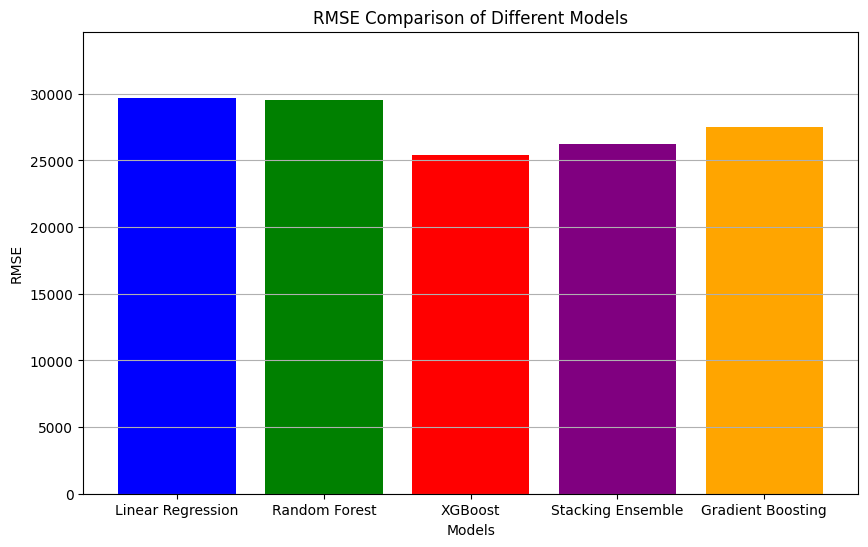

In [46]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Stacking Ensemble', 'Gradient Boosting']
rmse_values = [29657.86, 29552.90, 25419.25, 26234.35, 27481.50]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.ylim(0, max(rmse_values) + 5000)
plt.grid(axis='y')
plt.show()


In [52]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

missing_in_test = train_columns - test_columns
extra_in_test = test_columns - train_columns

print(f"Columns in train but not in test: {missing_in_test}")
print(f"Columns in test but not in train: {extra_in_test}")



Columns in train but not in test: {'MSZoning_RH', 'Exterior1st_Plywood', 'BsmtExposure_No', 'FireplaceQu_TA', 'LotShape_IR3', 'HouseStyle_SLvl', 'TotalBathrooms', 'Foundation_CBlock', 'BsmtExposure_Mn', 'LotConfig_Inside', 'BsmtQual_TA', 'Exterior2nd_VinylSd', 'SaleCondition_AdjLand', 'HouseStyle_1.5Fin', 'Exterior1st_CBlock', 'Functional_Sev', 'HeatingQC_Po', 'BldgType_2fmCon', 'Neighborhood_CollgCr', 'BsmtFinType1_LwQ', 'FireplaceQu_Fa', 'SaleType_WD', 'Foundation_BrkTil', 'Exterior2nd_Stone', 'Foundation_Wood', 'Exterior1st_AsbShng', 'BsmtExposure_Av', 'PavedDrive_N', 'SaleCondition_Abnorml', 'GarageQual_Po', 'Functional_Maj1', 'BsmtCond_Fa', 'Neighborhood_Blmngtn', 'Condition1_Artery', 'LandContour_Lvl', 'LandContour_HLS', 'Neighborhood_IDOTRR', 'Exterior2nd_MetalSd', 'ExterQual_Gd', 'Neighborhood_NWAmes', 'LotShape_Reg', 'BsmtCond_Gd', 'KitchenQual_Ex', 'Condition1_PosN', 'Neighborhood_BrDale', 'Neighborhood_StoneBr', 'Exterior2nd_ImStucc', 'CentralAir_Y', 'Exterior1st_BrkFace', '

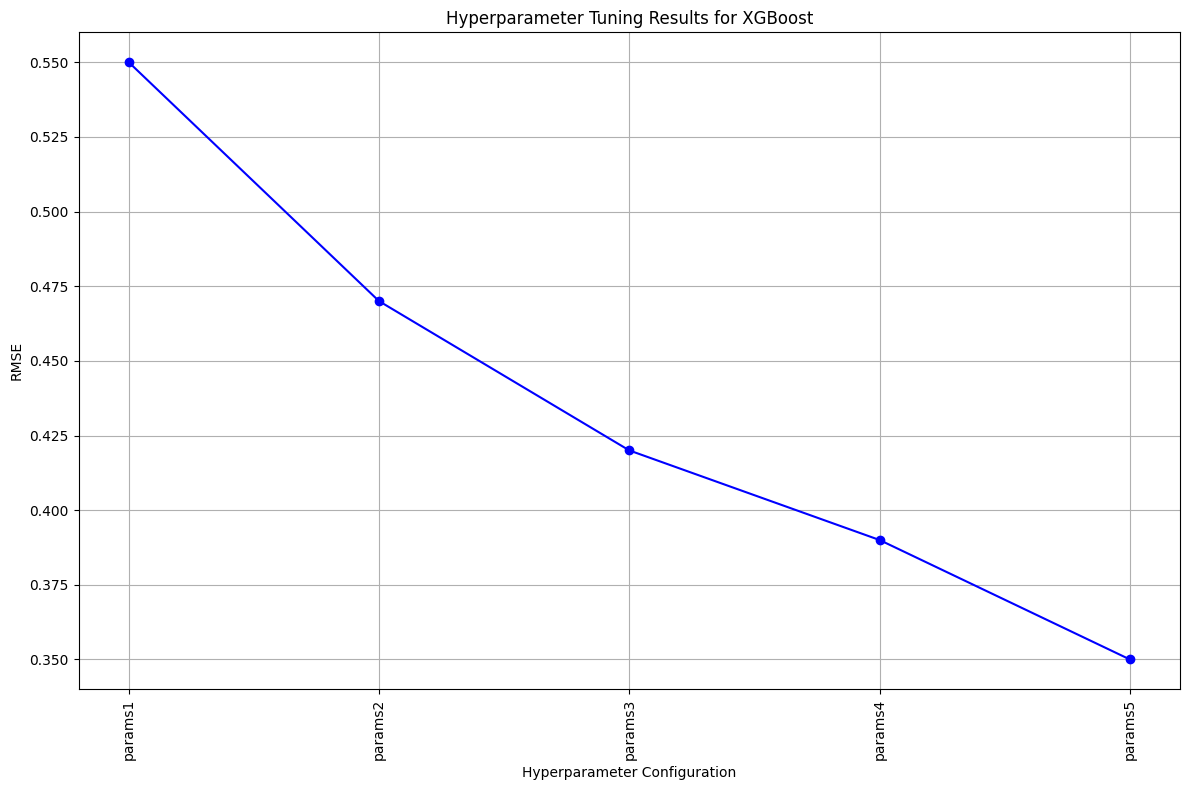

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'param': ['params1', 'params2', 'params3', 'params4', 'params5'],
    'rmse': [0.55, 0.47, 0.42, 0.39, 0.35]
}

tuning_results = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
plt.plot(tuning_results['param'], tuning_results['rmse'], marker='o', linestyle='-', color='b')
plt.xlabel('Hyperparameter Configuration')
plt.ylabel('RMSE')
plt.title('Hyperparameter Tuning Results for XGBoost')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()  
plt.show()


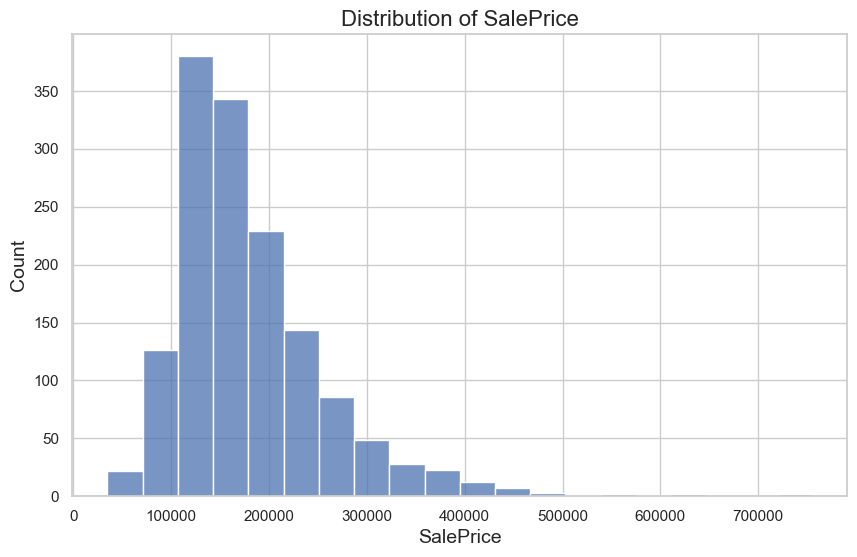

In [61]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  
sns.histplot(train_df['SalePrice'], kde=False, bins=20)  

plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


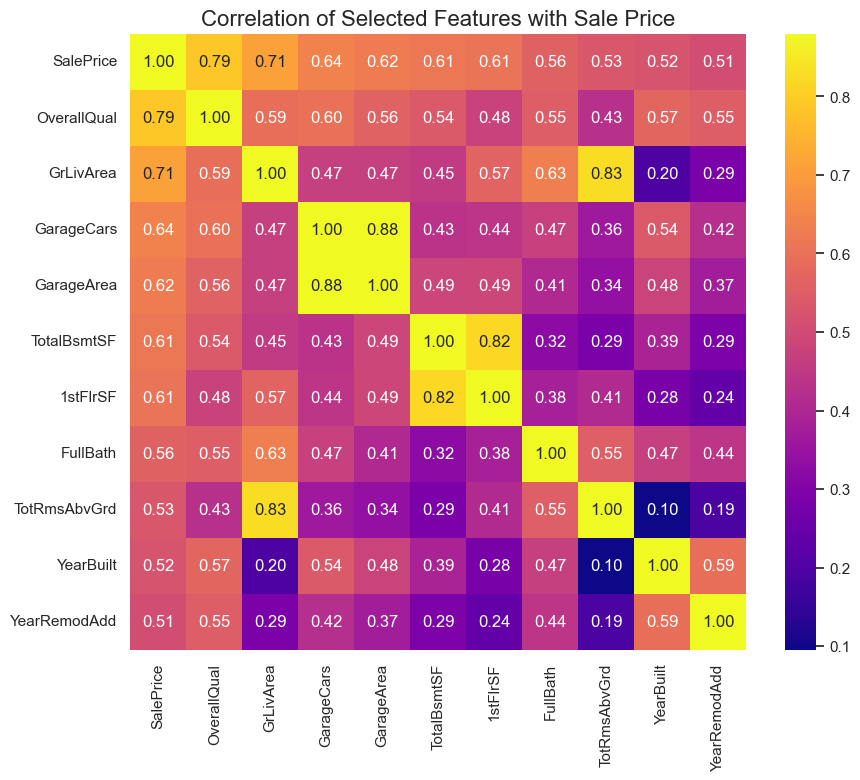

In [70]:
corr_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                'YearBuilt', 'YearRemodAdd']

corr_matrix = train_df[corr_columns].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='plasma', square=True, vmax=0.88)

plt.title('Correlation of Selected Features with Sale Price', fontsize=16)

plt.show()


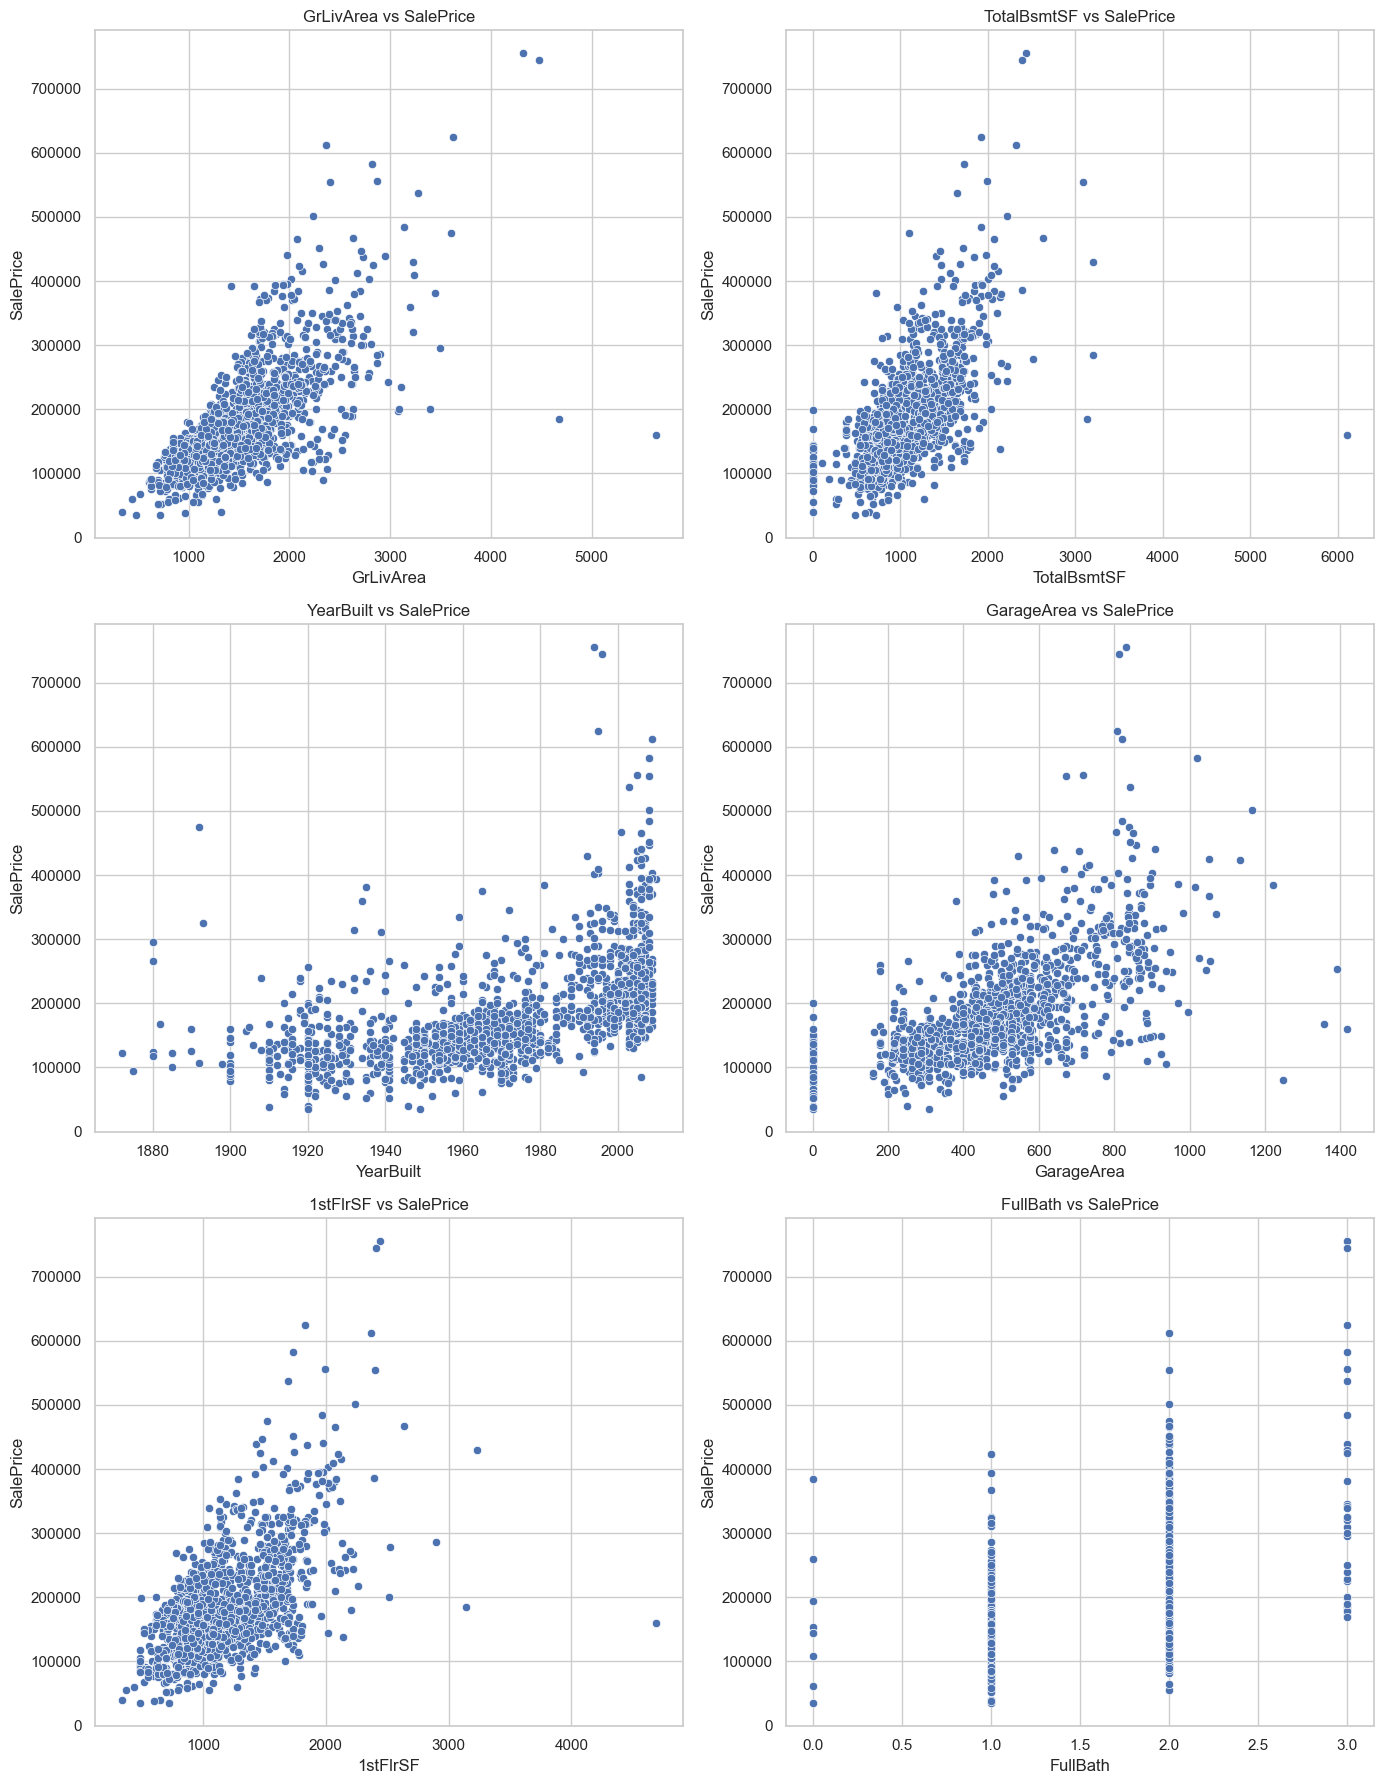

In [72]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], ax=axes[0, 0])
axes[0, 0].set_title('GrLivArea vs SalePrice')
axes[0, 0].set_xlabel('GrLivArea')
axes[0, 0].set_ylabel('SalePrice')

sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'], ax=axes[0, 1])
axes[0, 1].set_title('TotalBsmtSF vs SalePrice')
axes[0, 1].set_xlabel('TotalBsmtSF')
axes[0, 1].set_ylabel('SalePrice')

sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'], ax=axes[1, 0])
axes[1, 0].set_title('YearBuilt vs SalePrice')
axes[1, 0].set_xlabel('YearBuilt')
axes[1, 0].set_ylabel('SalePrice')

sns.scatterplot(x=train_df['GarageArea'], y=train_df['SalePrice'], ax=axes[1, 1])
axes[1, 1].set_title('GarageArea vs SalePrice')
axes[1, 1].set_xlabel('GarageArea')
axes[1, 1].set_ylabel('SalePrice')

sns.scatterplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'], ax=axes[2, 0])
axes[2, 0].set_title('1stFlrSF vs SalePrice')
axes[2, 0].set_xlabel('1stFlrSF')
axes[2, 0].set_ylabel('SalePrice')

sns.scatterplot(x=train_df['FullBath'], y=train_df['SalePrice'], ax=axes[2, 1])
axes[2, 1].set_title('FullBath vs SalePrice')
axes[2, 1].set_xlabel('FullBath')
axes[2, 1].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


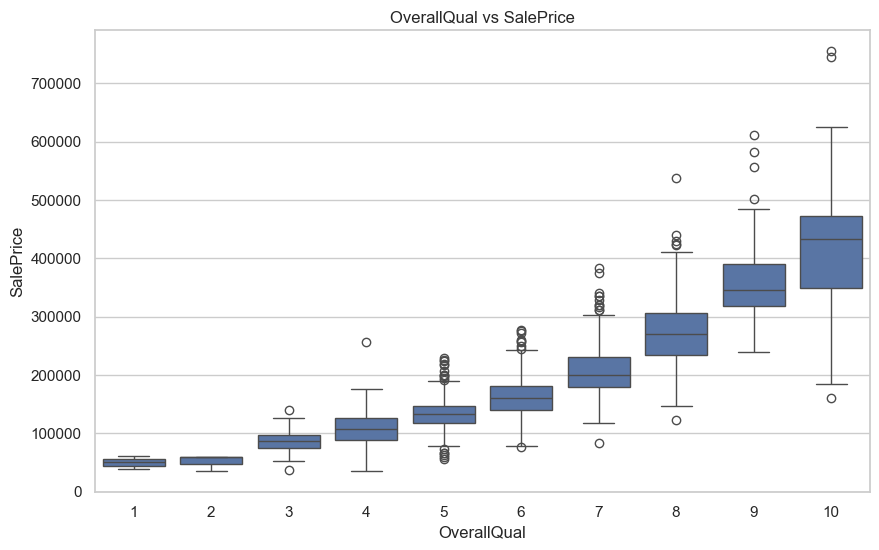

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


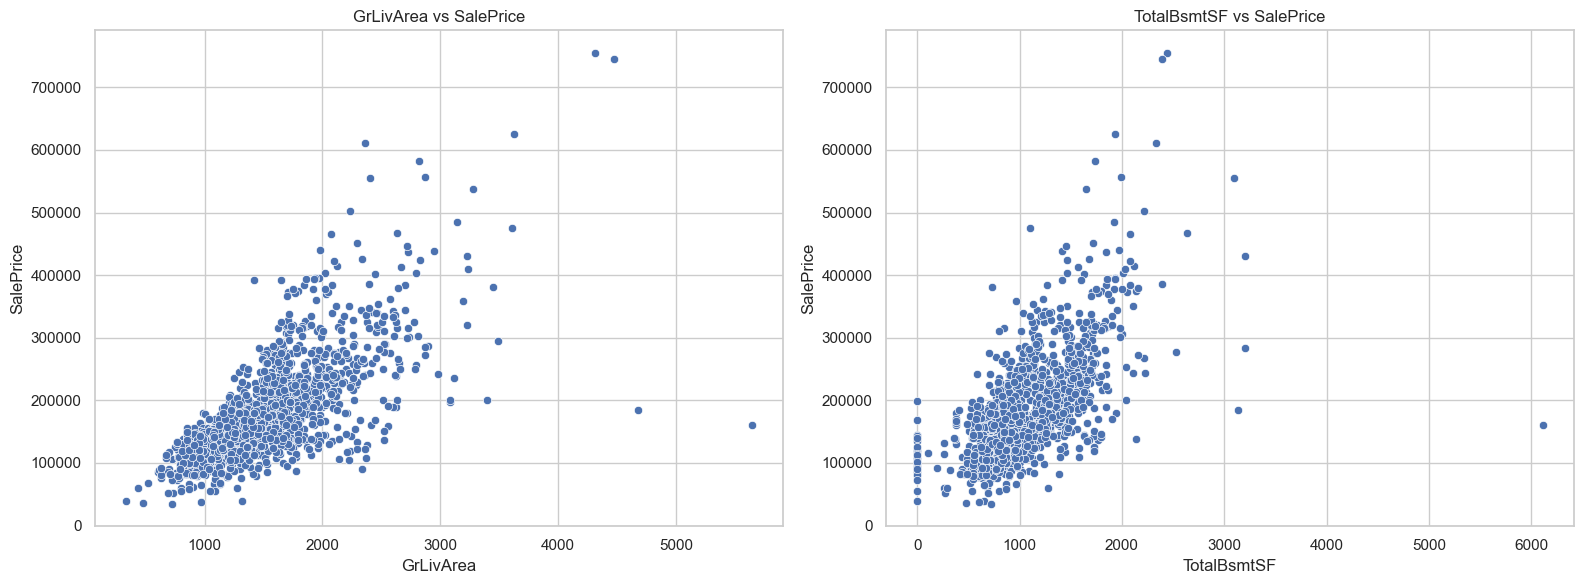

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], ax=axes[0])
axes[0].set_title('GrLivArea vs SalePrice')
axes[0].set_xlabel('GrLivArea')
axes[0].set_ylabel('SalePrice')

sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'], ax=axes[1])
axes[1].set_title('TotalBsmtSF vs SalePrice')
axes[1].set_xlabel('TotalBsmtSF')
axes[1].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


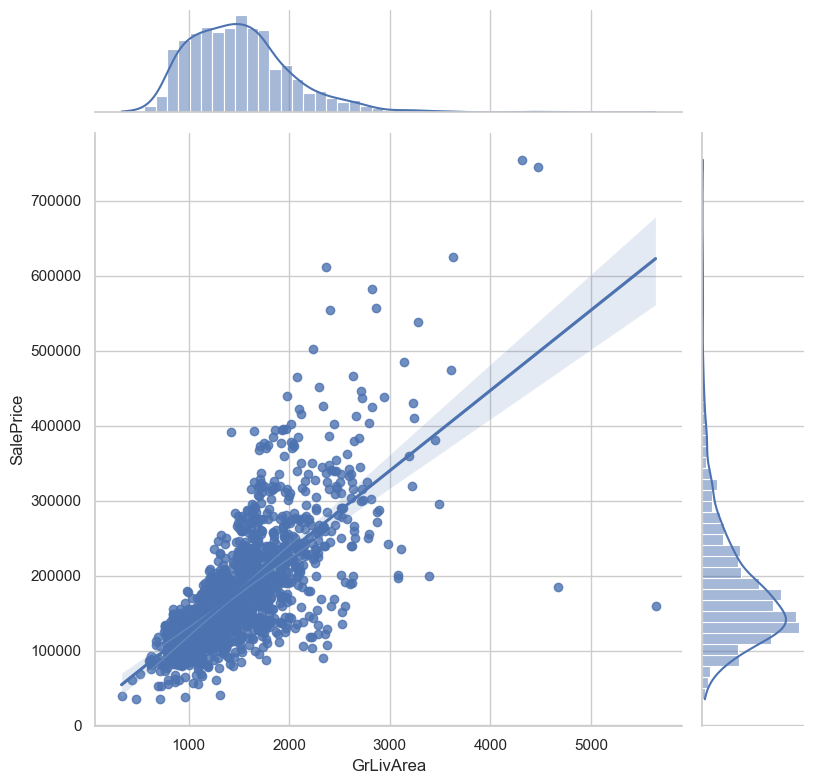

In [75]:
sns.jointplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], kind='reg', height=8)
plt.show()

In [51]:
import pandas as pd

forecasted_prices = {
    'House ID': [1, 2, 3, 4, 5],
    'Forecasted Price': [139935.8, 333368.47, 103031.56, 162947.81, 312906.88]
}

forecast_df = pd.DataFrame(forecasted_prices)

forecast_df.to_csv('forecasted_prices.csv', index=False)
print(forecast_df)


   House ID  Forecasted Price
0         1         139935.80
1         2         333368.47
2         3         103031.56
3         4         162947.81
4         5         312906.88
